<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C4/02_Visualizaciones_ggplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 3: Introducción a GGplot2

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

Ggplot es una librería basada en la gramática de gráficos, creadapor Wilkinson (2015). Básicamente la gramática de gráficos nos dice que un gráfico estadístico corresponde a un mapeo entre la data hacia atributos estéticos (como el color, forma o tamaño) de objetos geométricos (como puntos, líneas o barras).

## Referencias útiles

 * https://ggplot2.tidyverse.org/reference/index.html
 * https://r4ds.had.co.nz/data-visualisation.html
 * https://www.rdocumentation.org/packages/ggplot2/versions/3.3.0


## Cheatsheets
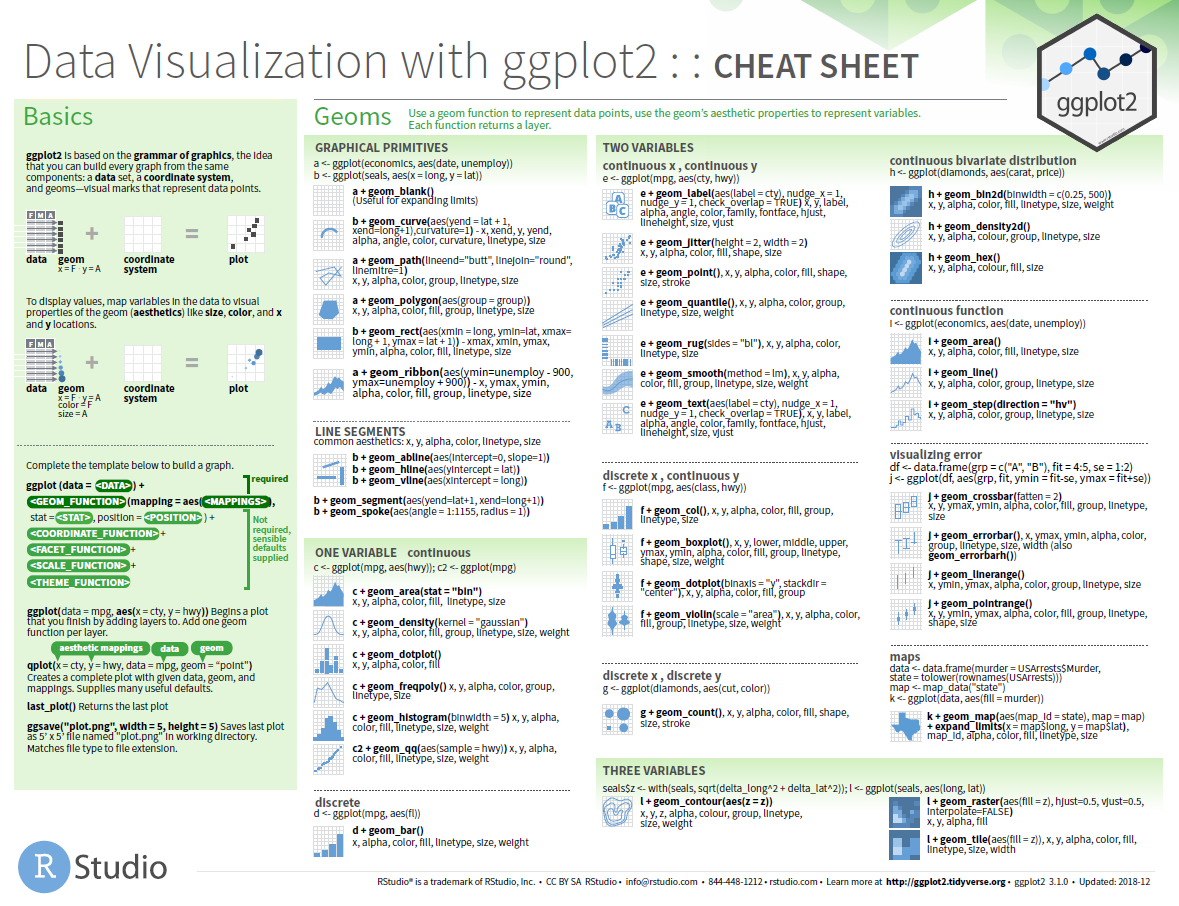


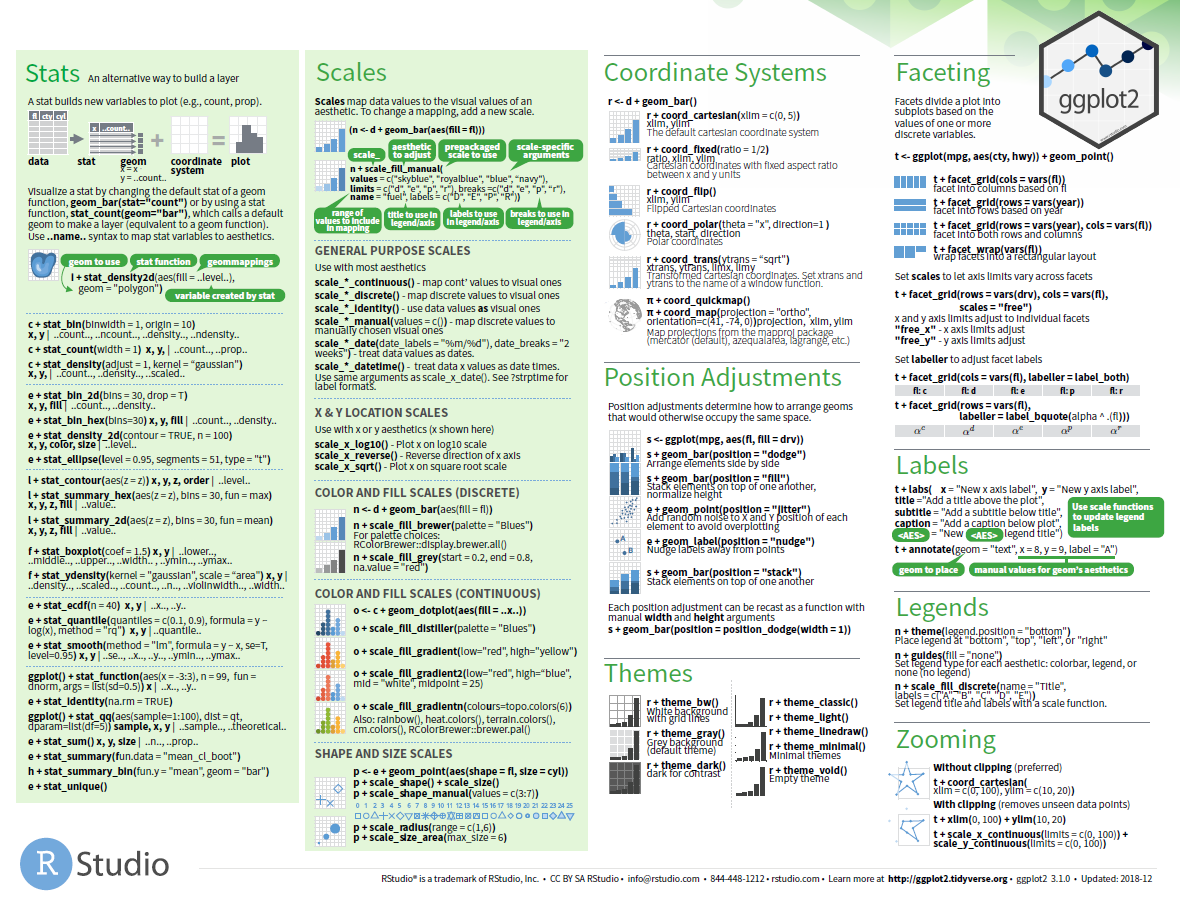


In [3]:
# Cargamos la librería
library(ggplot2) # install.packages("ggplot2")
# Otras librerías que pueden ser de interés: leaflet, iplots, highcharter * ,ggmap, visNetwork**

Para entender el funcionamiento de esta grámatica comencemos con un ejemplo analizando la data mpg:

In [4]:
# "+" es mas o menos lo mismo en ggplot que %>% de dplyr
data(mpg)
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


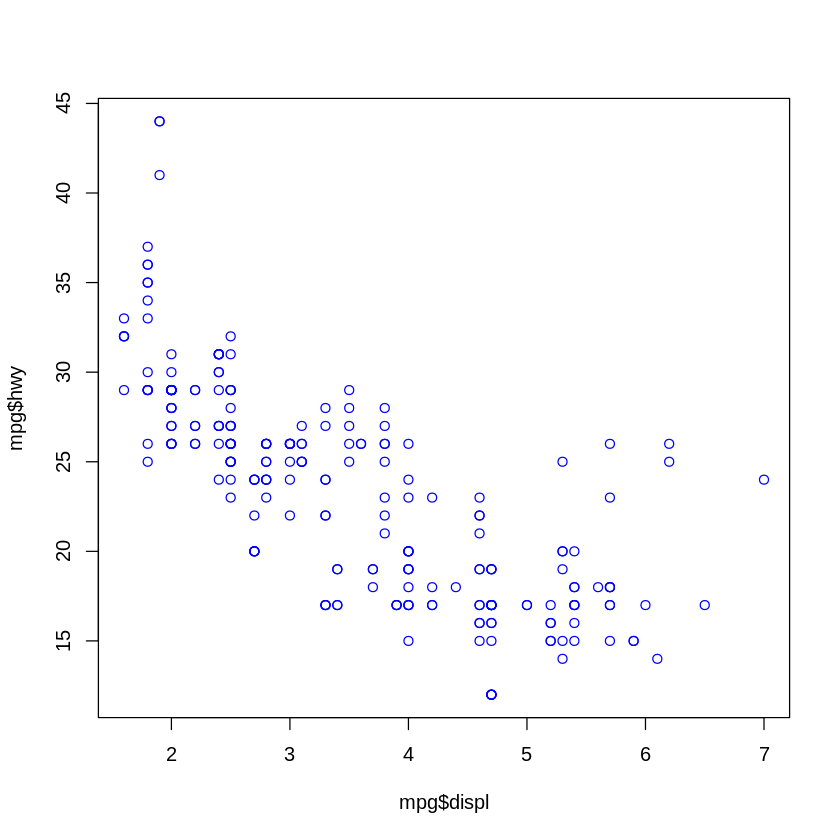

In [5]:
plot(mpg$displ, mpg$hwy, col = "blue")

In [6]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




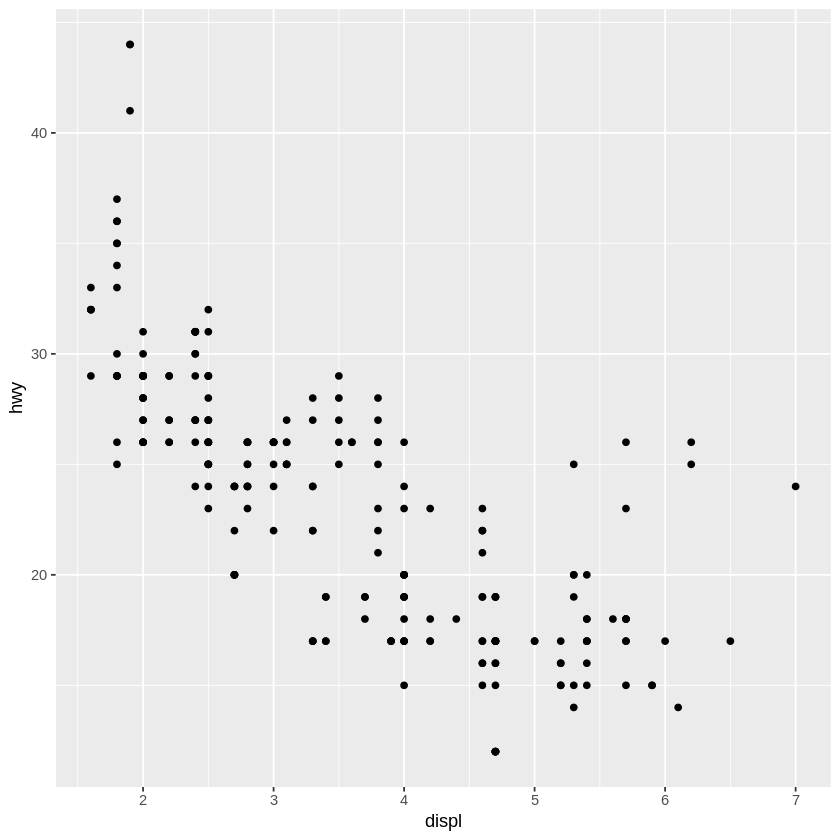

In [7]:
mpg %>%
    ggplot() + # Indicamos el origen de los datos que buscamos visualizar
    aes(x = displ, y = hwy) + # capa "estética" : aesthetical mapping (indicamos qué variables queremos visualizar)
    geom_point() # capa geométrica, se indica "cómo" queremos visualizar las variables indicadas en el aesthetical mapping

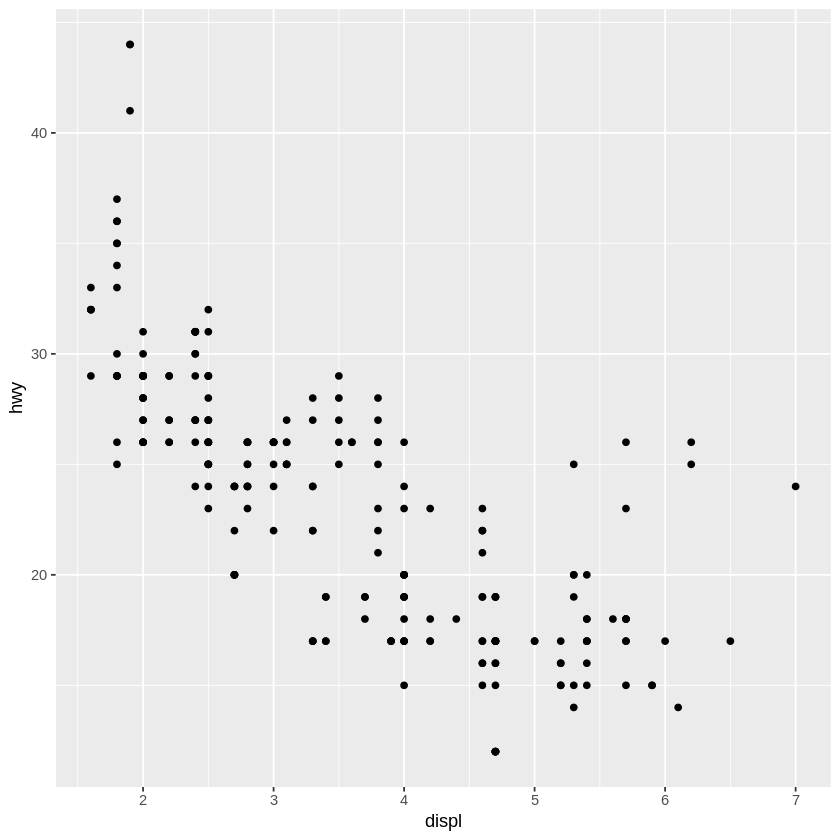

In [8]:
# tambien podemos generar el gráfico de la siguiente manera (aes( coo parametro mapping))
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point()

# I. Color, tamaño, forma y otros atributos estéticos

## I.1. Color
El color está dado por la variable categórica class (notar que es lo mismo si incluimos el parámetro color, colour o col. ggplot automáticamente entiende lo que queremos :) )

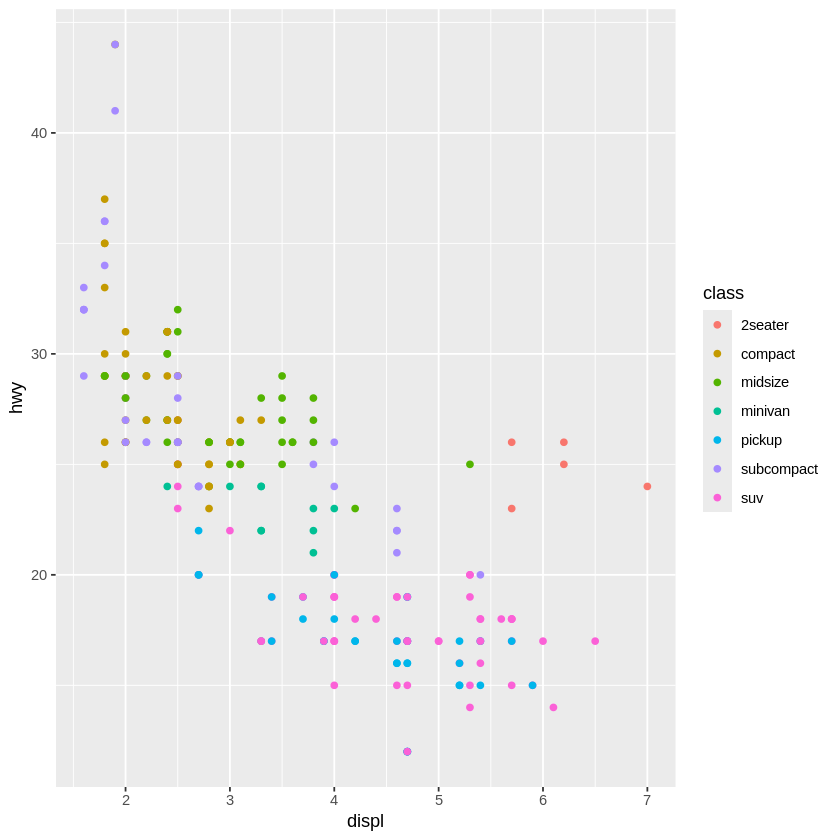

In [9]:
## Color por "class" dentro de aes
mpg %>%
    ggplot() +
    aes(x = displ, y = hwy, color = class) +
    geom_point()

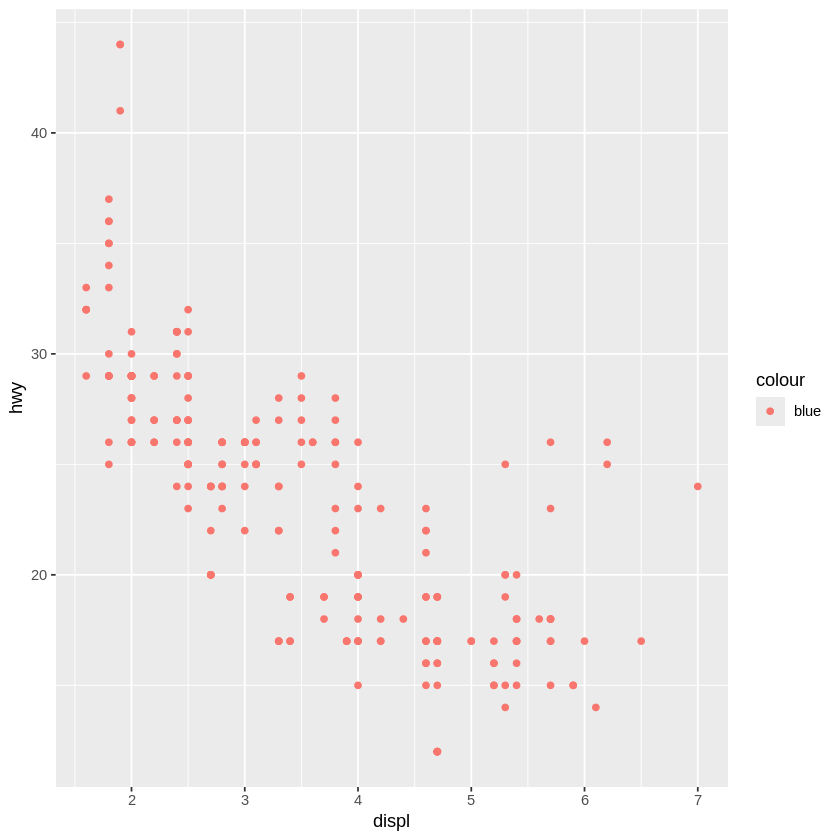

In [10]:
# y si queremos color azul?
mpg %>%
    ggplot() +
    aes(x = displ, y = hwy, color = "blue") +
    geom_point()


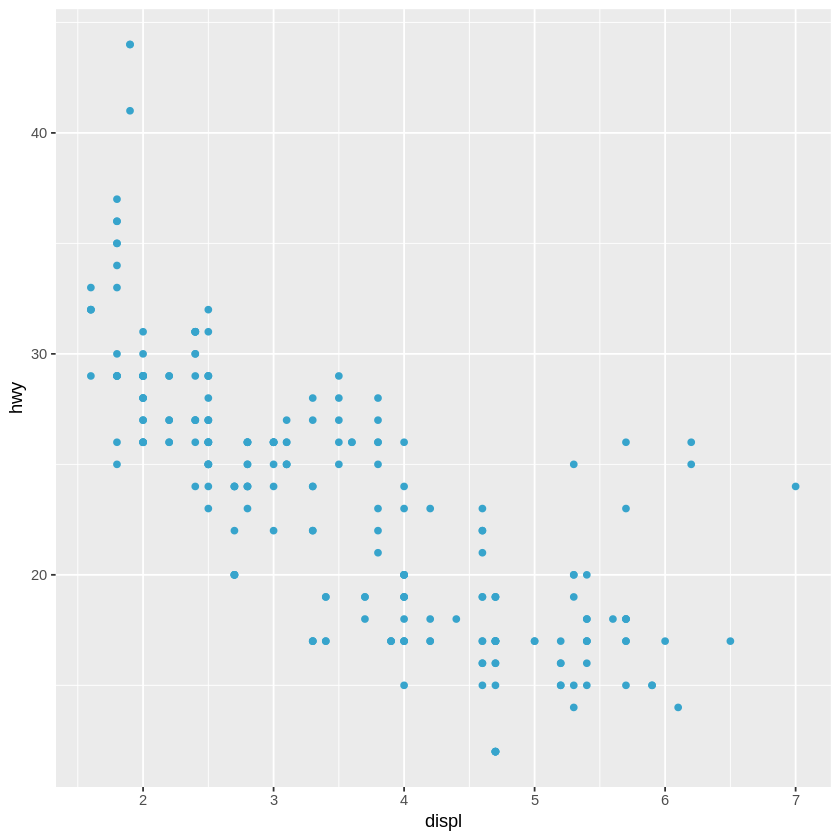

In [11]:
mpg %>%
    ggplot() +
    aes(x = displ, y = hwy) +
    geom_point(color = "#37a4cc")

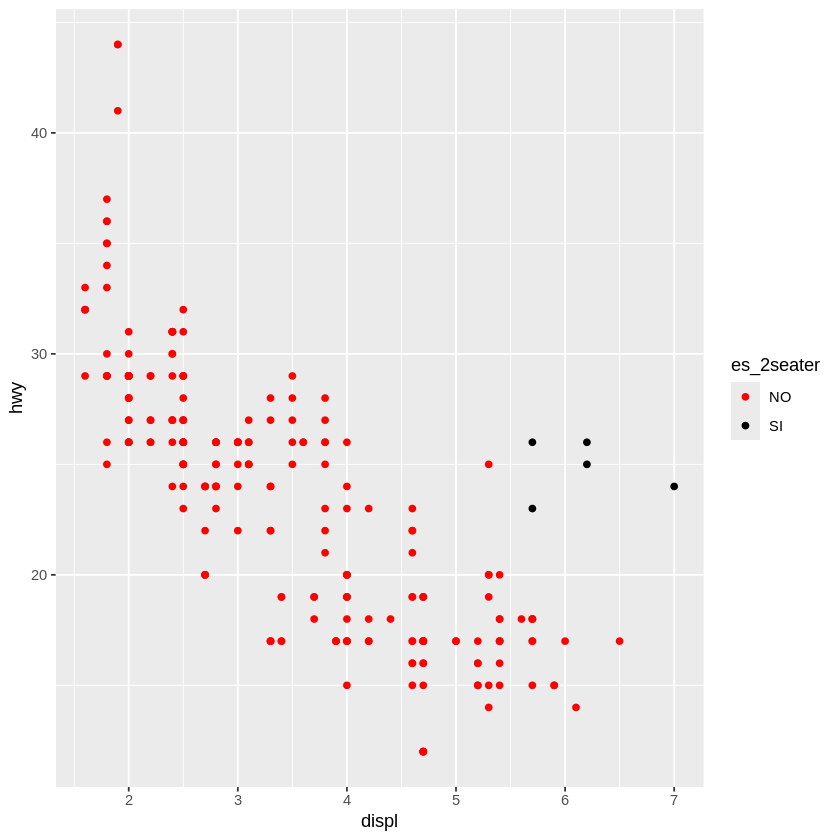

In [12]:
# Que pasa si queremos colorear en negro solo los de class "2seater"
mpg %>%
  # mutate(es_2seater = class == "2seater") #Op1 como booleano
  mutate(es_2seater = ifelse(class == "2seater", "SI", "NO")) %>%
  ggplot() +
  aes(x = displ, y = hwy, color = es_2seater) +
  geom_point() +
  scale_color_manual(values = c("red", "black"))


In [13]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


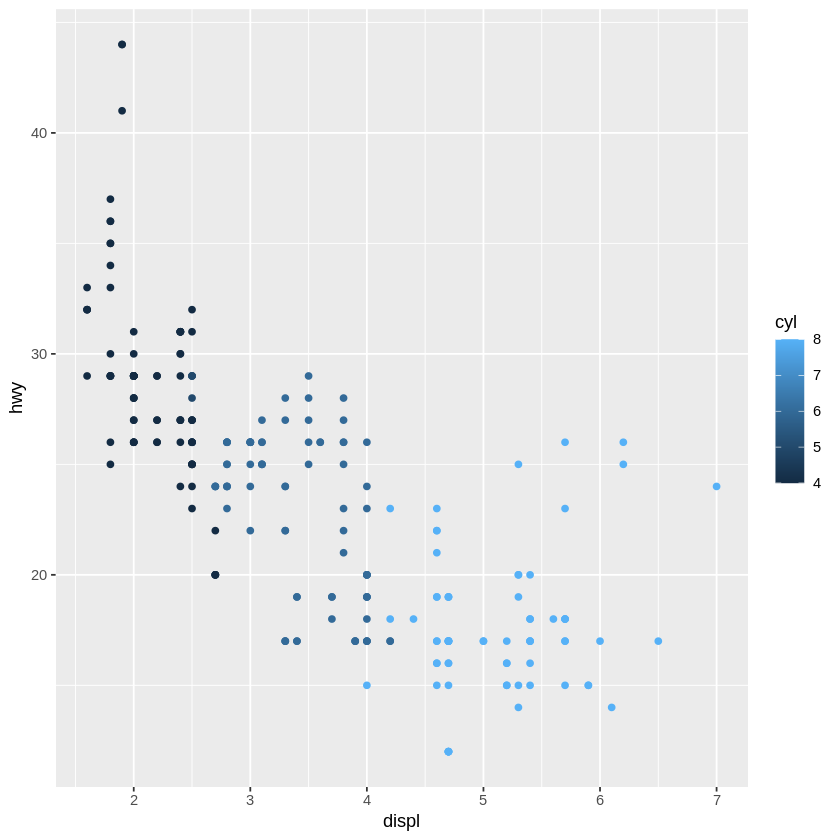

In [14]:
# que sucede si el color no es una variable discreta (categórica)
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, color = cyl) +
  geom_point()


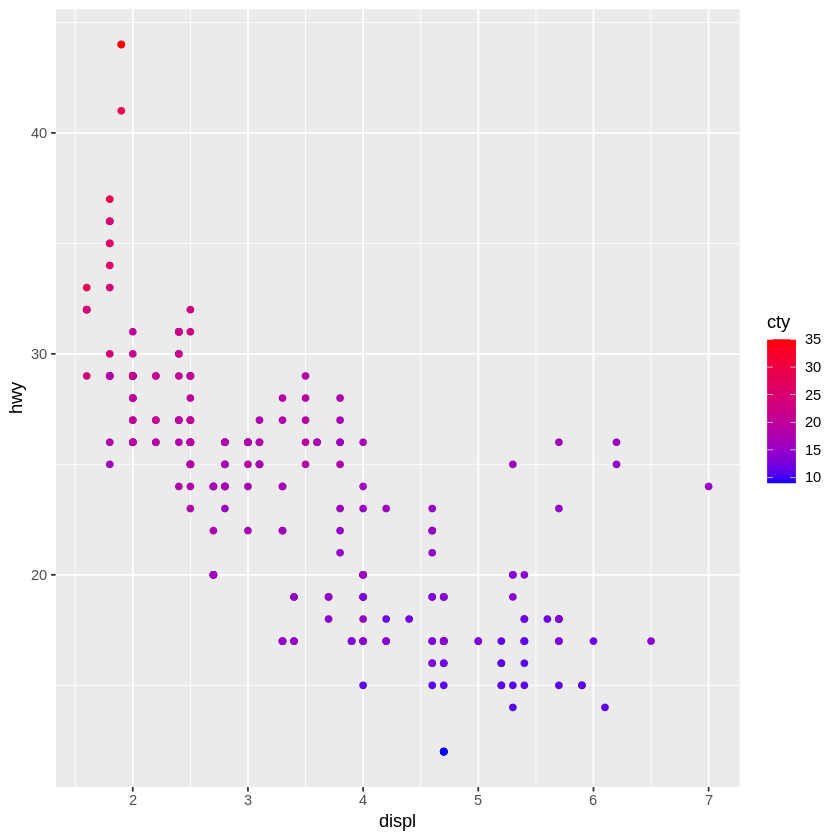

In [15]:
# Modificar la escala de colores y dar la impresión de "intensidad"
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, color = cty) +
  geom_point() +
  scale_color_continuous(low = "blue", high = "red")

## I.2. Forma

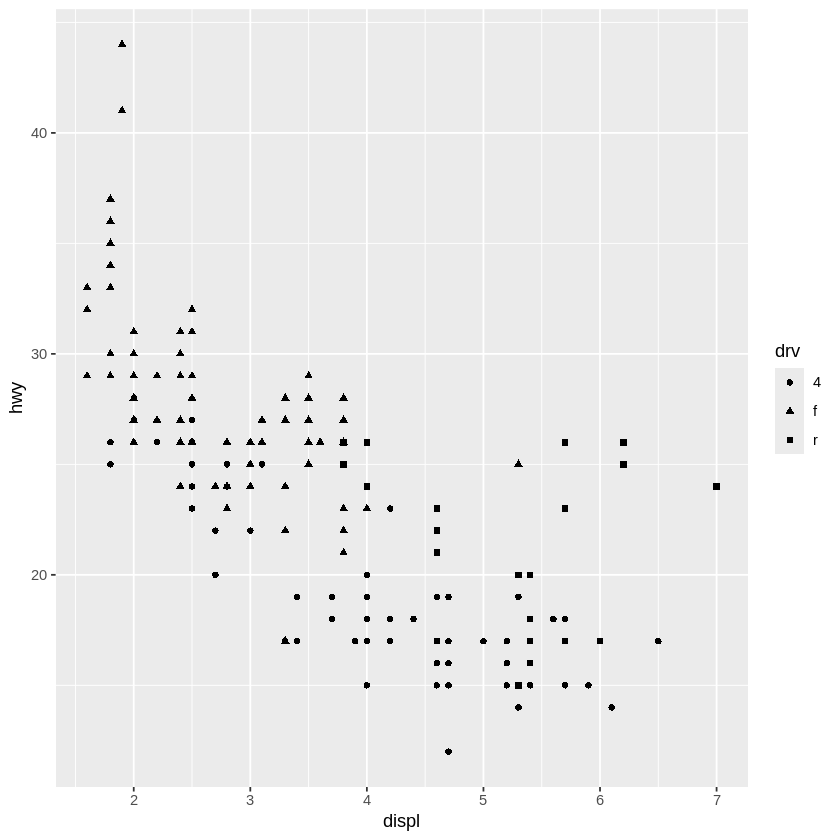

In [16]:
## Forma (shape) según "drv"
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, shape = drv) +
  geom_point()

In [17]:
# El parámetro alpha permite regular la intensidad el color en función de la densidad de los puntos.


## I.3. Forma y color

In [18]:
## Forma y color (color = class, shape = drv)


## I.4. Tamaño

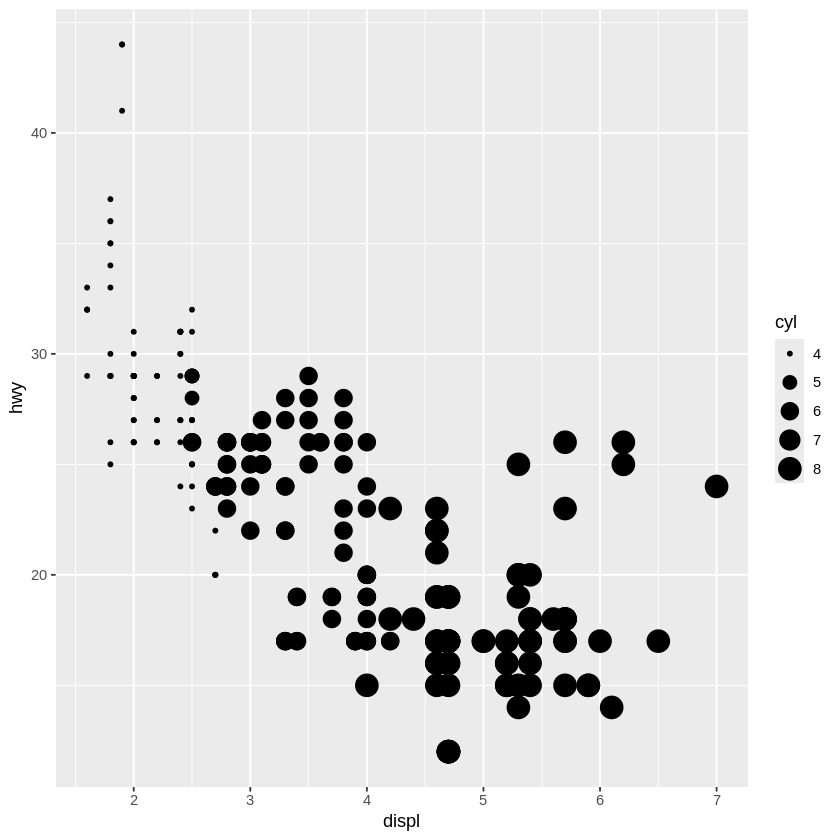

In [19]:
## Tamaño (size) según "cyl"
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, size = cyl) +
  geom_point()

Warning message:
“Using size for a discrete variable is not advised.”


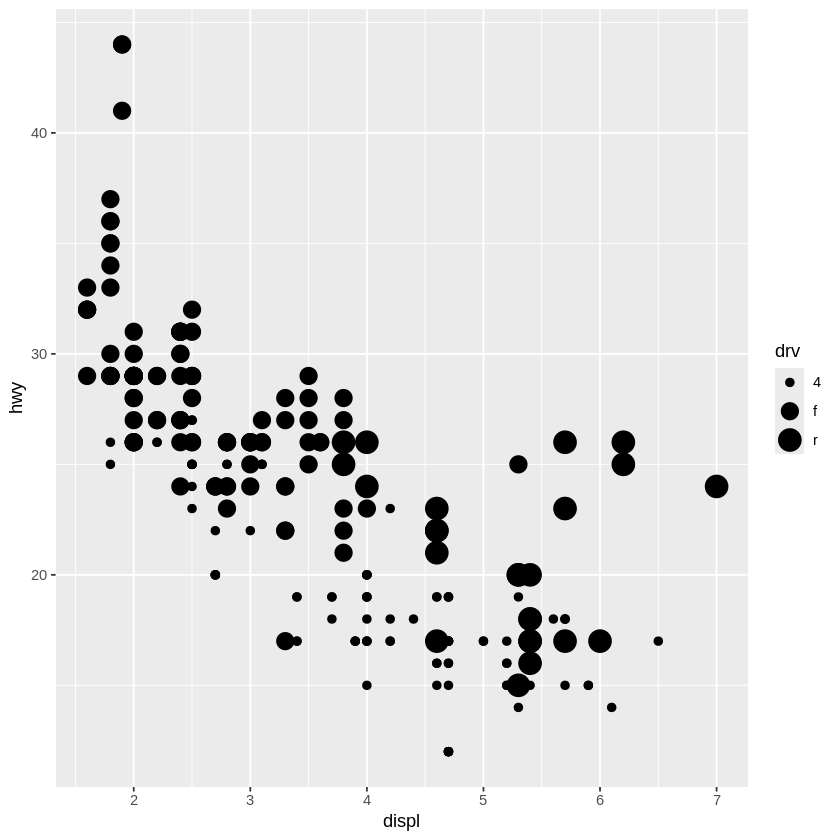

In [ ]:
# size = drv? nota: no tiene sentido dar el tamaño segú nuna variable categórica (R internamente la ordena alfabéticamente y luego asigna el valor del tamañao)
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, size = drv) +
  geom_point()

# II. Facetas

En inglés Facetting, es una manera de dividir la data disponible según variables categóricas y mostrar el mismo gráfico por cada categoría en una misma imagen.

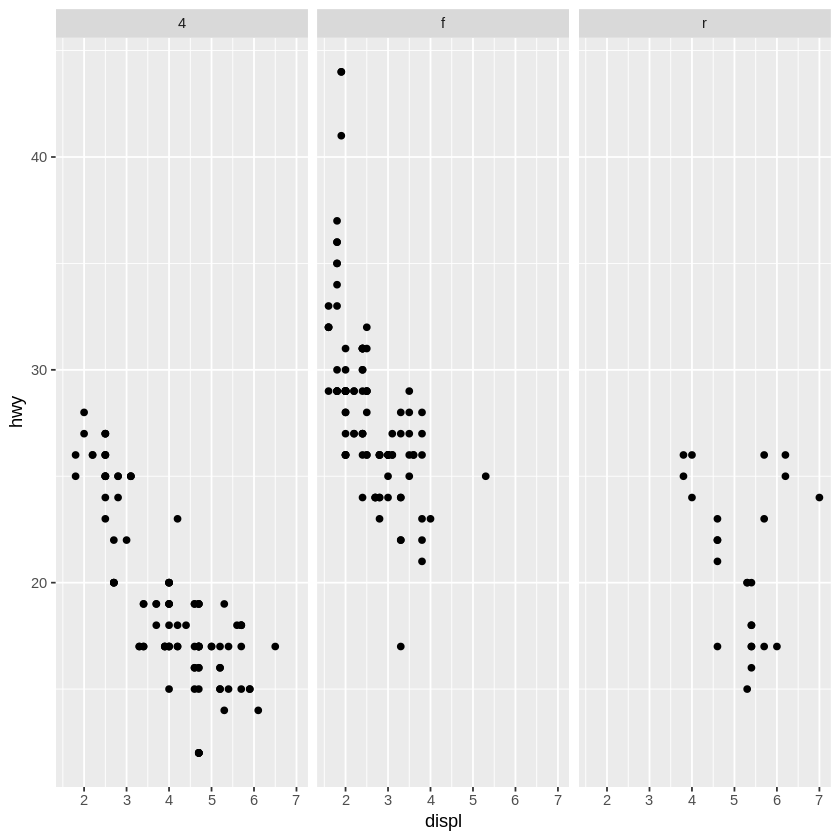

In [21]:
# Apertura por drv
# Small multiples
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, ) +
  geom_point() +
  facet_wrap(~ drv) # Aperture todas las variables por cada categoria de drv



Grafique otras relaciones entre la eficiencia (hwy o cty), tamaño del motor (displ) por cada  número de cilindros (cyl). ¿Qué se observa?

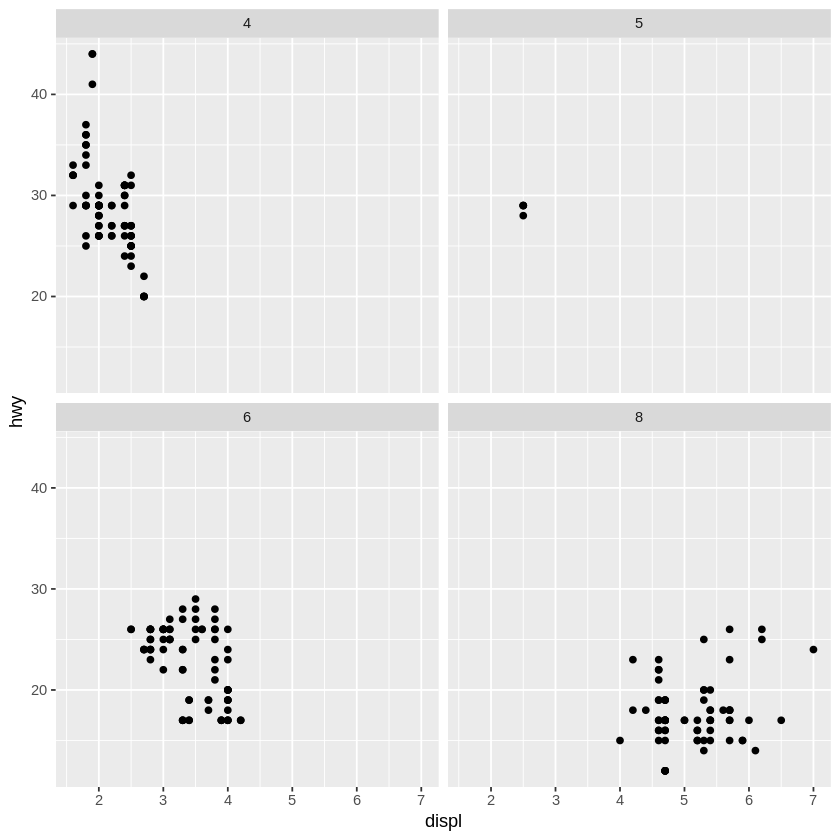

In [22]:
# Por ejemplo, x=displ,y=hwy , aperturado por número de cilindros
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, ) +
  geom_point() +
  facet_wrap(~ cyl)

# III. Capas geométricas: prefijo geom_

Hasta aquí hemos utilizado sólo una de las diversas maneras de mostrar (geométricamente hablando) la relación entre las variables hasta aquí descritas.
En ggplot existe una gran variedad de funciones "geom_", sólo veremos algunas de ellas, aunque en la documentación oficial se describen todas las opciones disponibles https://ggplot2.tidyverse.org/index.html

## III.1 geom_point()

La fución geom_point() se encarga de visualizar las variables definidas en aes() como un gráfico de dispersión.

## III.2 geom_smooth()
Con esta función podemos añadir una curva de tendencia a nuestros datos


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


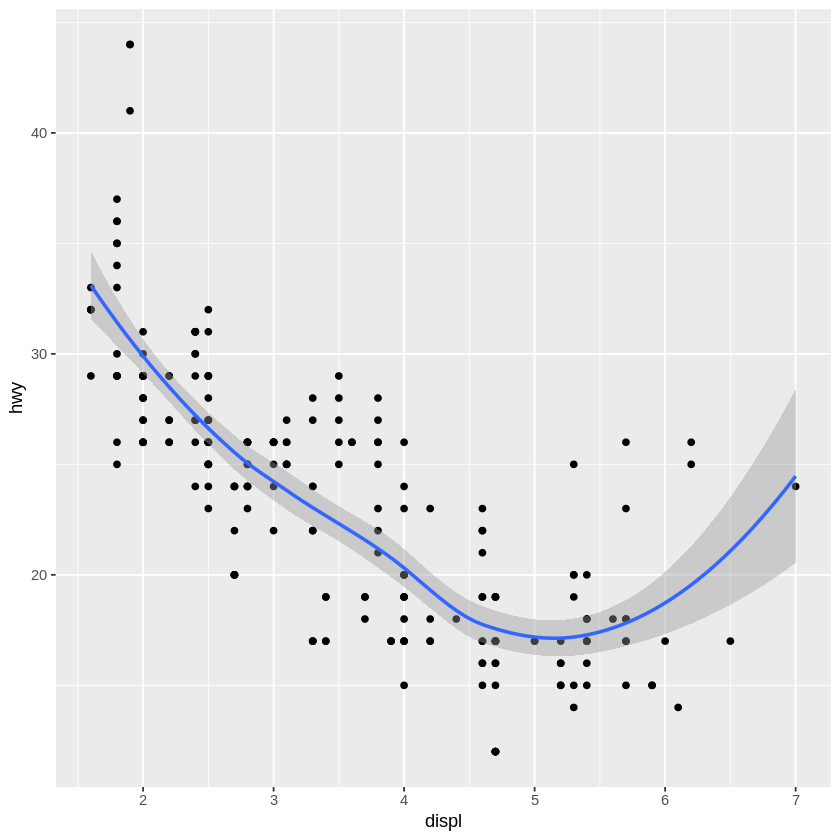

In [24]:
#geom_smooth()
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, ) +
  geom_point() +
  geom_smooth()



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


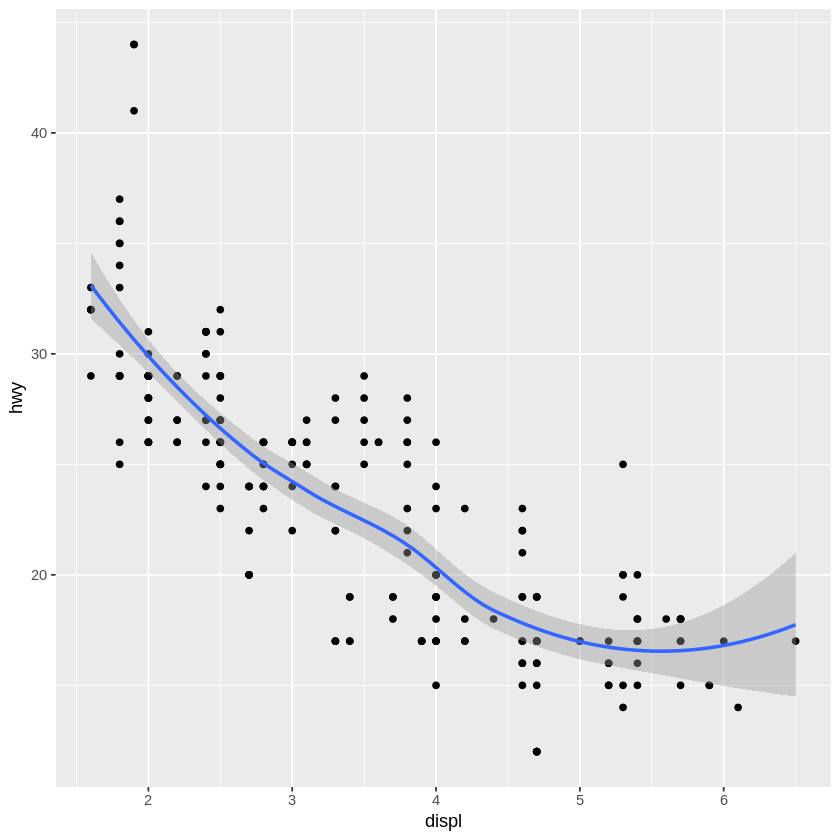

In [26]:
mpg %>%
  filter(class != "2seater") %>%
  ggplot() +
  aes(x = displ, y = hwy ) +
  geom_point() +
  geom_smooth()


`geom_smooth()` using formula = 'y ~ x'


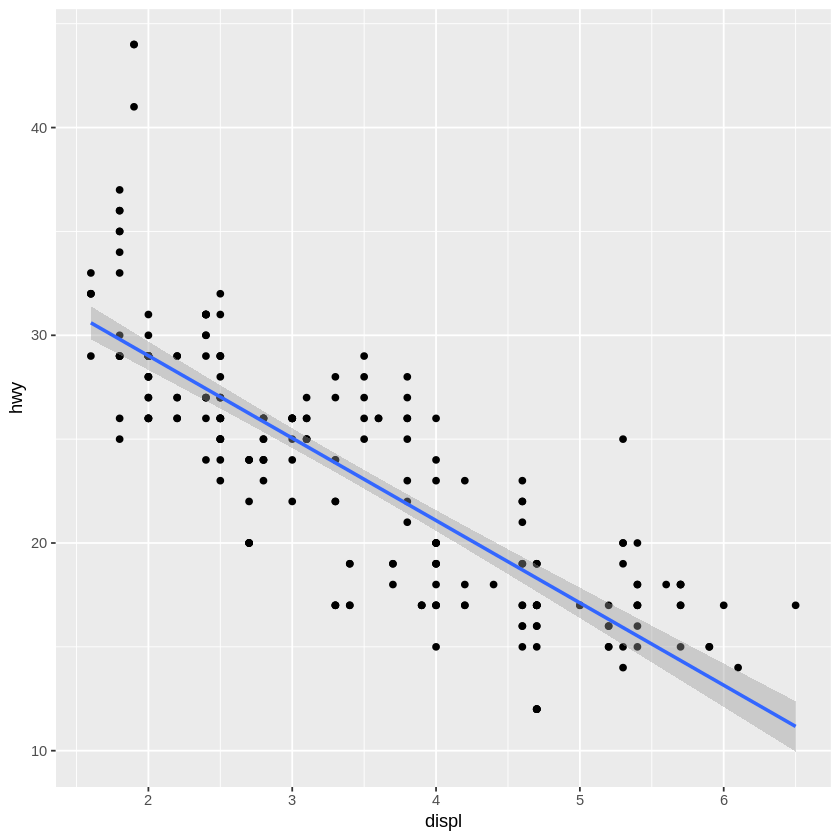

In [28]:
# Forzando a que visualice una regresión lineal
mpg %>%
  filter(class != "2seater") %>%
  ggplot() +
  aes(x = displ, y = hwy ) +
  geom_point() +
  geom_smooth(method = "lm")

¿Cómo podemos graficar las curvas de tendencia para cada tipo de tracción (drv)?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


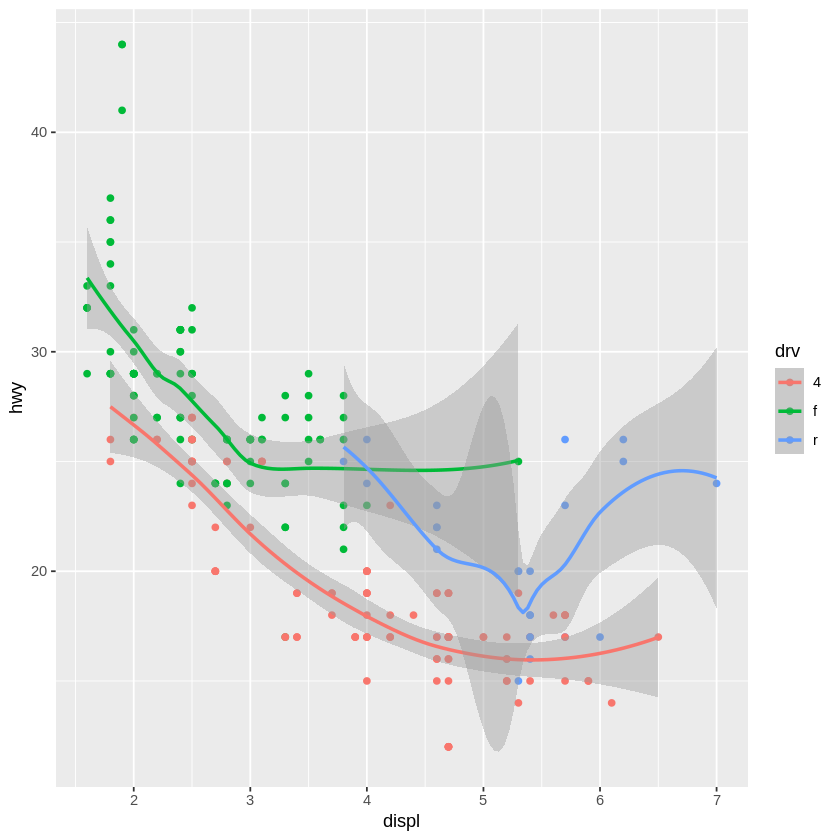

In [29]:
# por color
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy, color = drv ) +
  geom_point() +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


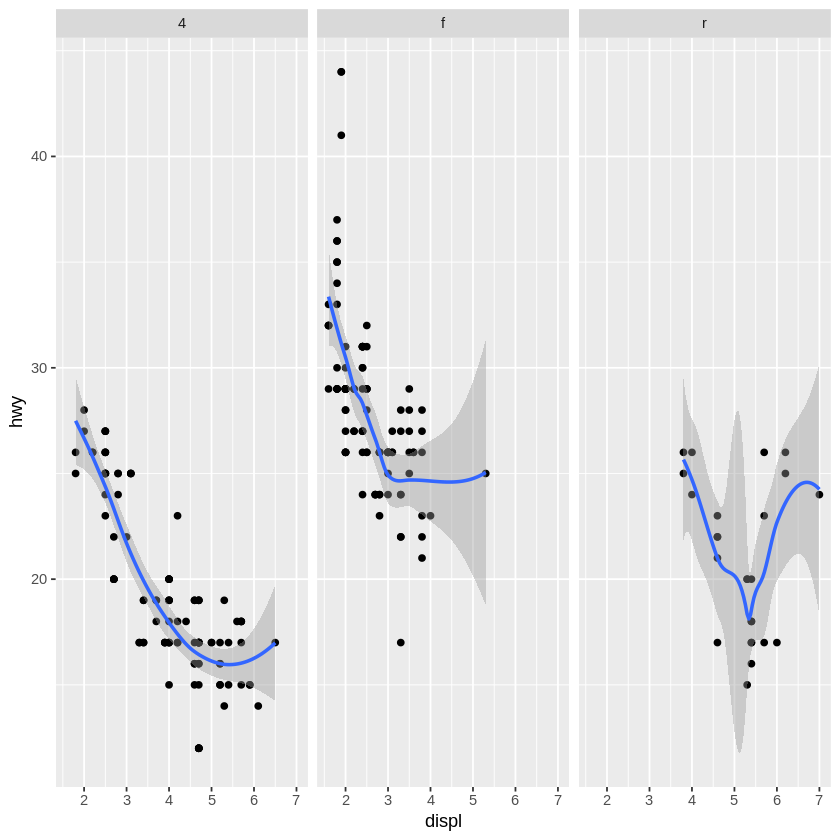

In [37]:
# y usando facet_wrap
mpg %>%
  ggplot() +
  aes(x = displ, y = hwy) +
  geom_point() +
  geom_smooth() +
  facet_wrap(~drv)

## III.3 geom_boxplot() y geom_jitter()
 Podemos variar la forma del gráfico modificando la capa geométrica con las funciones geom_
 Por ejemplo, hace un rato visualizamos la relación entre hwy y drv. Para este tipo de relaciones es más informativo un gráfico de cajas.

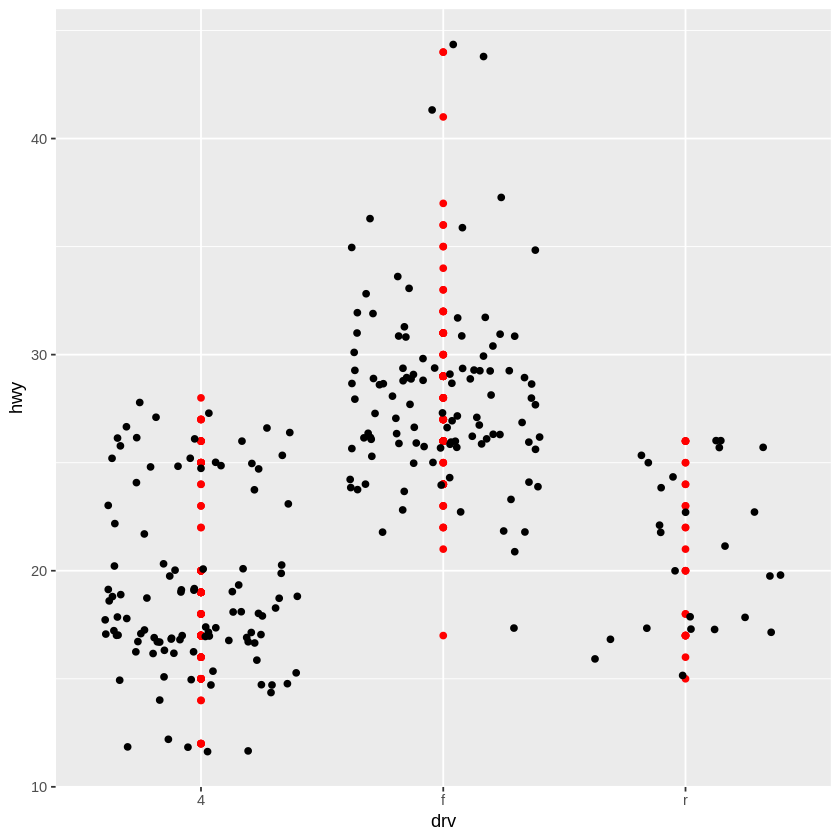

In [40]:
mpg %>%
  ggplot() +
  aes(x = drv, y = hwy) +
  geom_point(color = "red") + # Puntos originales
  geom_jitter() # No es el gráfico ideal, pero nos da una primera impresión de como se está distribuyendo el rendimiento

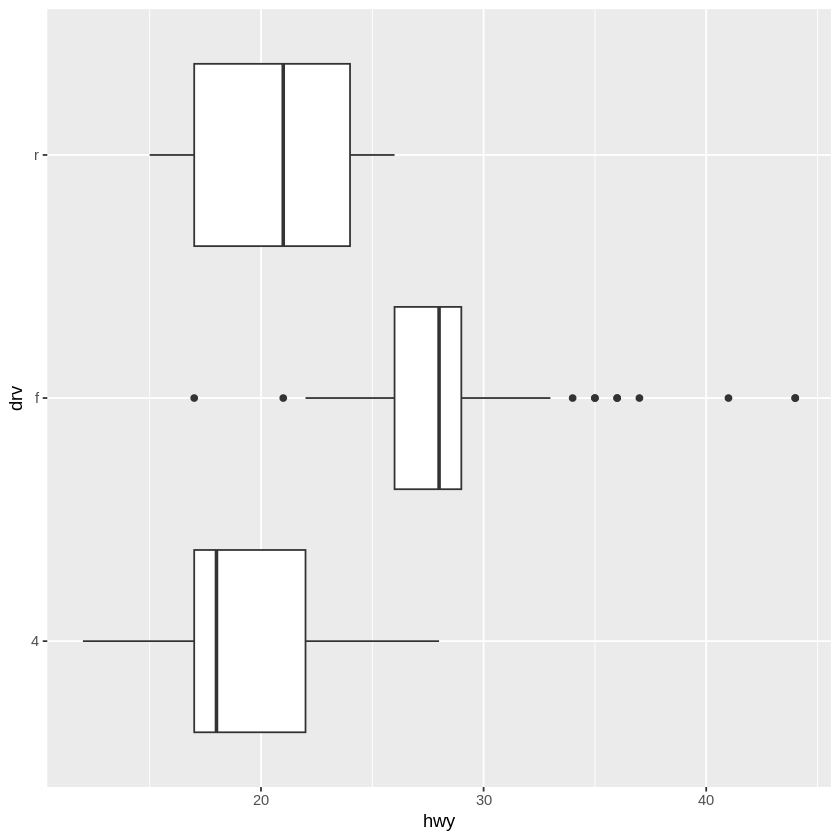

In [54]:
mpg %>%
  ggplot() +
  aes(y = drv, x = hwy) +
  geom_boxplot()

## III.4 geom_histogram() y  geom_freqpoly()

Con estas funciones es posible graficar histogramas y la frecuencia absoluta a través de una curva poligonal

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


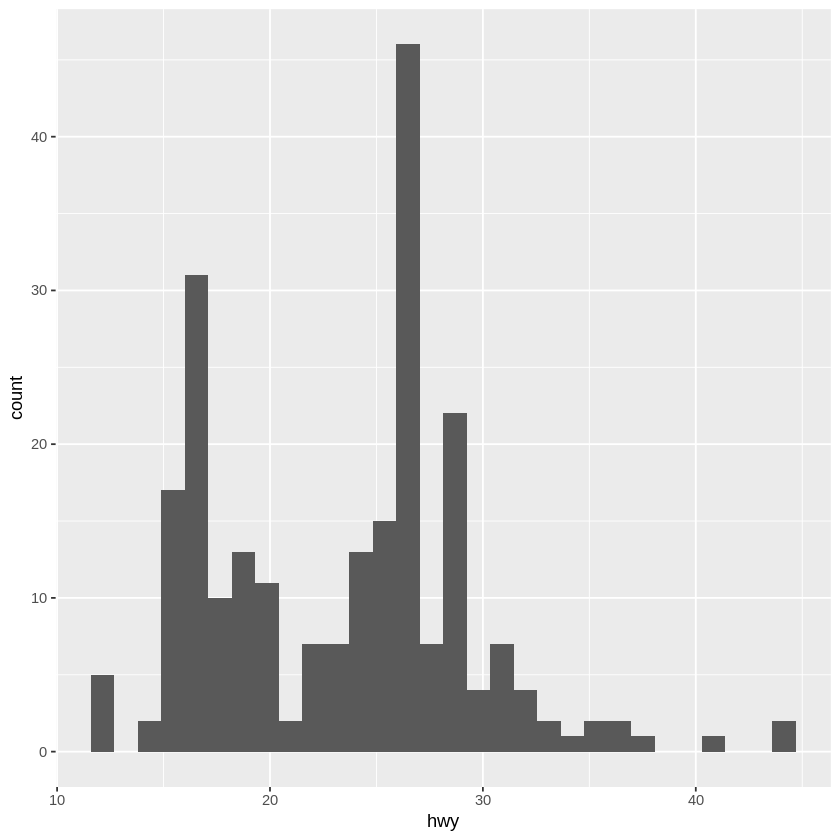

In [47]:
## histograma . Parámetro bins =30 en geom_histogram()
mpg %>%
  ggplot() +
  aes(x = hwy) +
  geom_histogram() # Histograma de frecuencias absolutas.


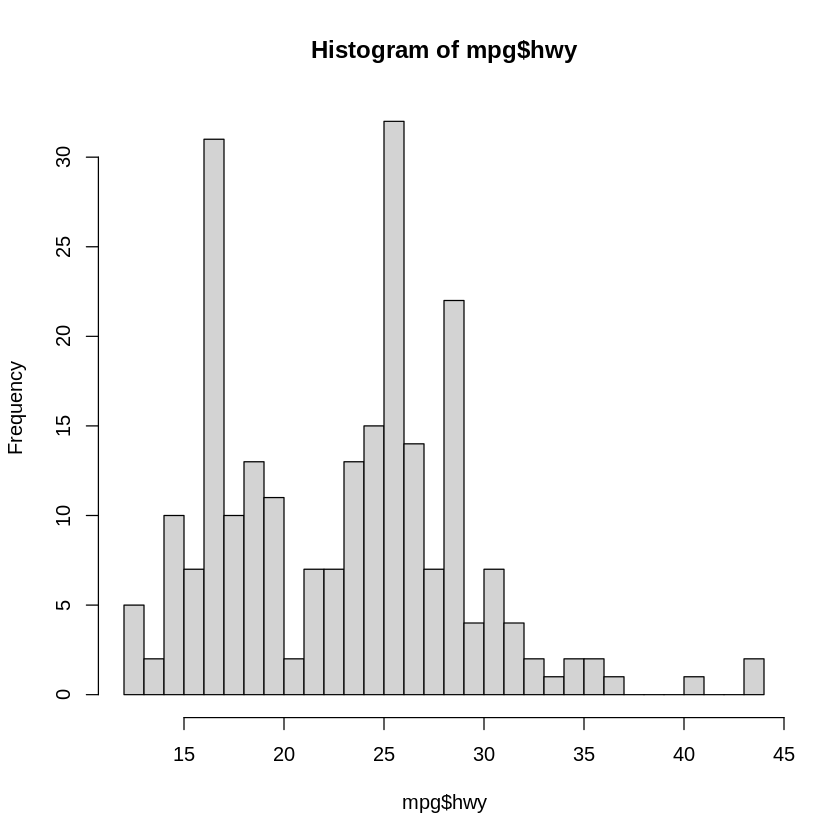

In [49]:
# Con base
hist(mpg$hwy, breaks = 30)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


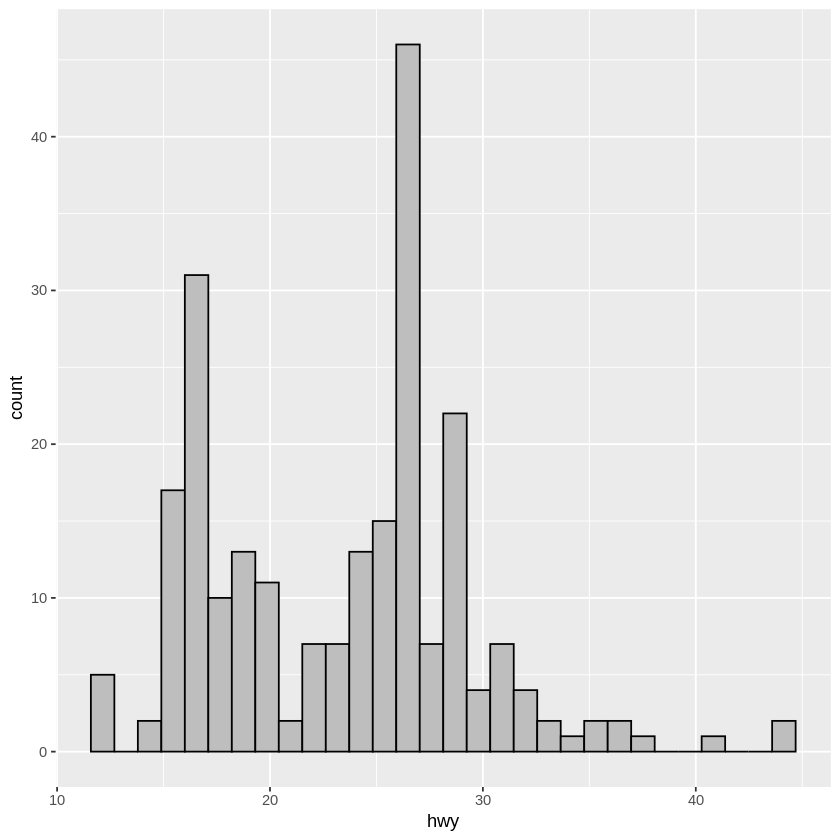

In [51]:
mpg %>%
  ggplot() +
  aes(x = hwy) +
  geom_histogram(color = "black", fill = "grey") # Histograma de frecuencias absolutas.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


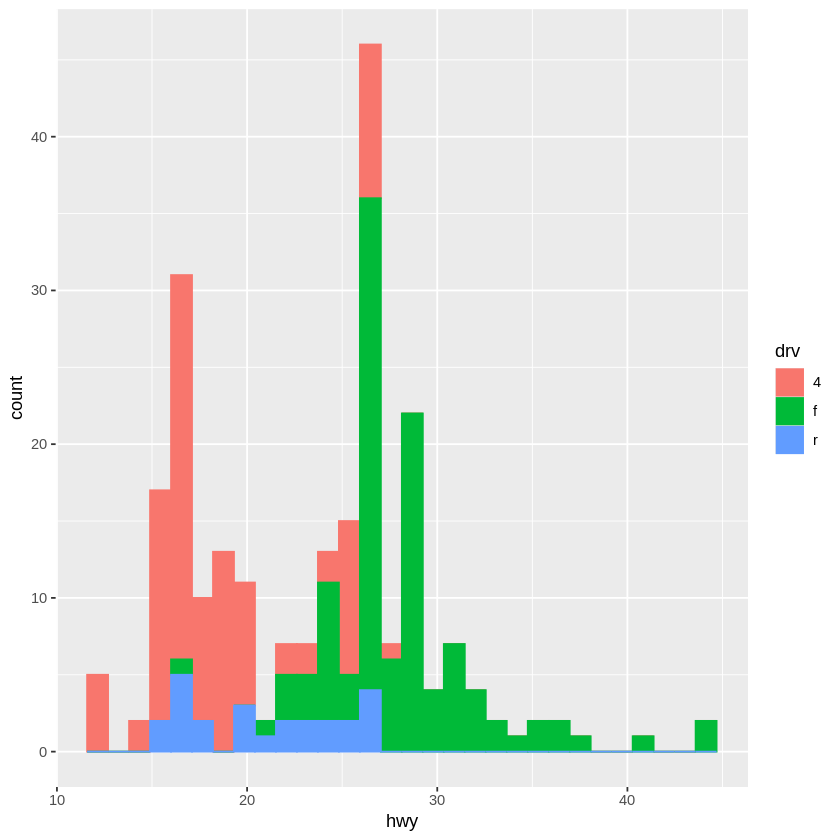

In [52]:
# podemos aperturar por drv (en color  y fill)
mpg %>%
  ggplot() +
  aes(x = hwy, color = drv, fill = drv) +
  geom_histogram()

#usando facet_wrap



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


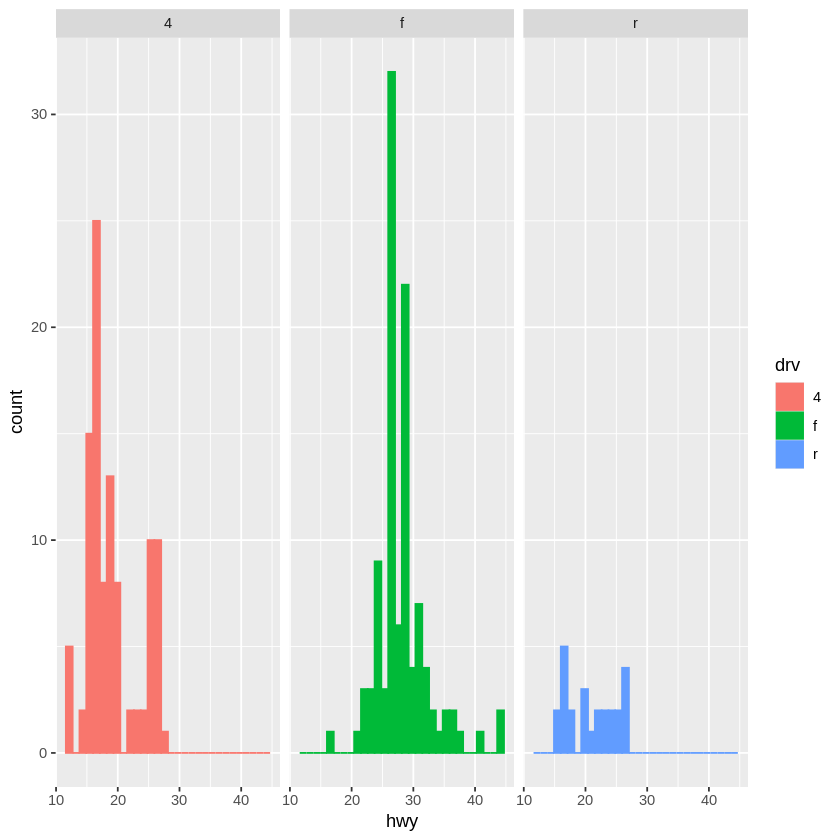

In [53]:
mpg %>%
  ggplot() +
  aes(x = hwy, color = drv, fill = drv) +
  geom_histogram() +
  facet_wrap(~drv)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


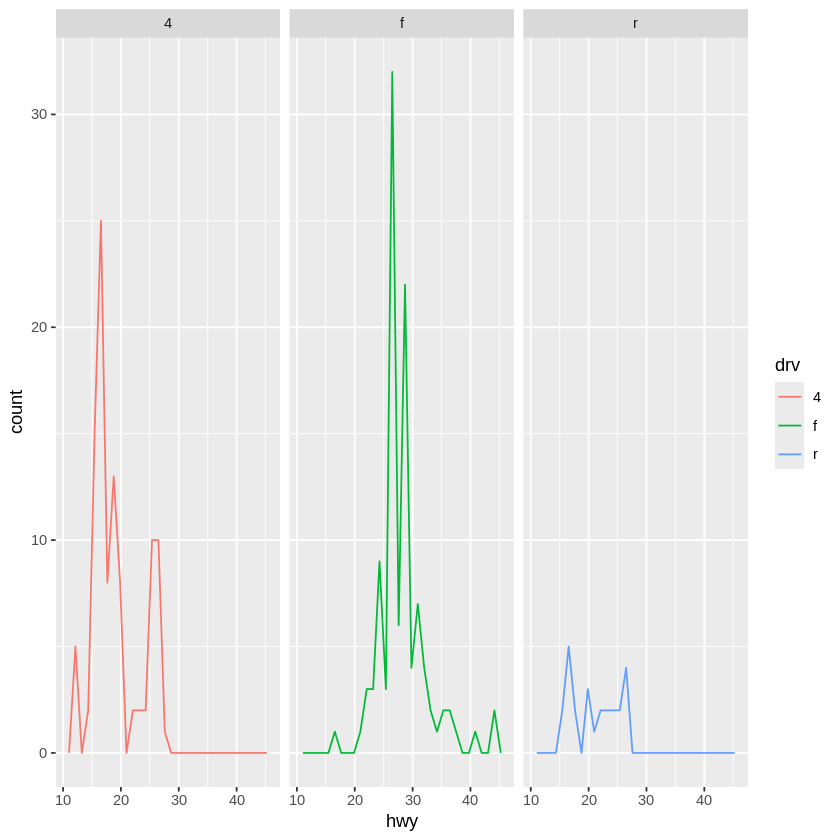

In [55]:
## polígono de frecuencias # geom_freqpoly
mpg %>%
  ggplot() +
  aes(x = hwy, color = drv, fill = drv) +
  geom_freqpoly() +
  facet_wrap(~drv)


## III.4 geom_line()

Podemos generar gráficos de linea, por ejemplo de series temporales.










In [56]:
library(dplyr)
library(httr)# para hacer consultas a APIS via HTTP
library(jsonlite) # Transformar objetos tipo json
library(ggplot2)

url_base <-"https://mindicador.cl"



In [57]:
consulta <- GET(url_base,path = "/api/dolar/2024")
consulta



Response [https://mindicador.cl/api/dolar/2024]
  Date: 2024-10-15 22:55
  Status: 200
  Content-Type: application/json; charset=utf-8
  Size: 10.4 kB


In [59]:
text <- content(consulta, as = "text")
text

[1] "{\"version\":\"1.7.0\",\"autor\":\"mindicador.cl\",\"codigo\":\"dolar\",\"nombre\":\"Dólar observado\",\"unidad_medida\":\"Pesos\",\"serie\":[{\"fecha\":\"2024-10-16T03:00:00.000Z\",\"valor\":937.29},{\"fecha\":\"2024-10-15T03:00:00.000Z\",\"valor\":928.37},{\"fecha\":\"2024-10-14T03:00:00.000Z\",\"valor\":926.07},{\"fecha\":\"2024-10-11T03:00:00.000Z\",\"valor\":931.26},{\"fecha\":\"2024-10-10T03:00:00.000Z\",\"valor\":934.84},{\"fecha\":\"2024-10-09T03:00:00.000Z\",\"valor\":933.62},{\"fecha\":\"2024-10-08T03:00:00.000Z\",\"valor\":925.86},{\"fecha\":\"2024-10-07T03:00:00.000Z\",\"valor\":923.74},{\"fecha\":\"2024-10-04T03:00:00.000Z\",\"valor\":919.49},{\"fecha\":\"2024-10-03T03:00:00.000Z\",\"valor\":908.23},{\"fecha\":\"2024-10-02T03:00:00.000Z\",\"valor\":901.13},{\"fecha\":\"2024-10-01T03:00:00.000Z\",\"valor\":897.68},{\"fecha\":\"2024-09-30T03:00:00.000Z\",\"valor\":896.25},{\"fecha\":\"2024-09-27T03:00:00.000Z\",\"valor\":900.91},{\"fecha\":\"2024-09-26T03:00:00.000Z\",\"valor\":912.24},{\"fecha\":\"2024-09-25T03:00:00.000Z\",\"valor\":911.51},{\"fecha\":\"2024-09-24T03:00:00.000Z\",\"valor\":924.81},{\"fecha\":\"2024-09-23T03:00:00.000Z\",\"valor\":927.15},{\"fecha\":\"2024-09-17T03:00:00.000Z\",\"valor\":923.37},{\"fecha\":\"2024-09-16T03:00:00.000Z\",\"valor\":925.61},{\"fecha\":\"2024-09-13T03:00:00.000Z\",\"valor\":933.57},{\"fecha\":\"2024-09-12T03:00:00.000Z\",\"valor\":943.44},{\"fecha\":\"2024-09-11T03:00:00.000Z\",\"valor\":948.85},{\"fecha\":\"2024-09-10T03:00:00.000Z\",\"valor\":946.22},{\"fecha\":\"2024-09-09T03:00:00.000Z\",\"valor\":943.18},{\"fecha\":\"2024-09-06T04:00:00.000Z\",\"valor\":941.54},{\"fecha\":\"2024-09-05T04:00:00.000Z\",\"valor\":937.86},{\"fecha\":\"2024-09-04T04:00:00.000Z\",\"valor\":926.22},{\"fecha\":\"2024-09-03T04:00:00.000Z\",\"valor\":915.14},{\"fecha\":\"2024-09-02T04:00:00.000Z\",\"valor\":913.99},{\"fecha\":\"2024-08-30T04:00:00.000Z\",\"valor\":917.38},{\"fecha\":\"2024-08-29T04:00:00.000Z\",\"valor\":912.08},{\"fecha\":\"2024-08-28T04:00:00.000Z\",\"valor\":907.32},{\"fecha\":\"2024-08-27T04:00:00.000Z\",\"valor\":907.35},{\"fecha\":\"2024-08-26T04:00:00.000Z\",\"valor\":911.01},{\"fecha\":\"2024-08-23T04:00:00.000Z\",\"valor\":919.94},{\"fecha\":\"2024-08-22T04:00:00.000Z\",\"valor\":918.97},{\"fecha\":\"2024-08-21T04:00:00.000Z\",\"valor\":922.58},{\"fecha\":\"2024-08-20T04:00:00.000Z\",\"valor\":929.36},{\"fecha\":\"2024-08-19T04:00:00.000Z\",\"valor\":933.84},{\"fecha\":\"2024-08-16T04:00:00.000Z\",\"valor\":931.39},{\"fecha\":\"2024-08-14T04:00:00.000Z\",\"valor\":932.28},{\"fecha\":\"2024-08-13T04:00:00.000Z\",\"valor\":931.96},{\"fecha\":\"2024-08-12T04:00:00.000Z\",\"valor\":932.62},{\"fecha\":\"2024-08-09T04:00:00.000Z\",\"valor\":937.18},{\"fecha\":\"2024-08-08T04:00:00.000Z\",\"valor\":943.96},{\"fecha\":\"2024-08-07T04:00:00.000Z\",\"valor\":947.18},{\"fecha\":\"2024-08-06T04:00:00.000Z\",\"valor\":957.57},{\"fecha\":\"2024-08-05T04:00:00.000Z\",\"valor\":951.11},{\"fecha\":\"2024-08-02T04:00:00.000Z\",\"valor\":938.94},{\"fecha\":\"2024-08-01T04:00:00.000Z\",\"valor\":943.78},{\"fecha\":\"2024-07-31T04:00:00.000Z\",\"valor\":956.58},{\"fecha\":\"2024-07-30T04:00:00.000Z\",\"valor\":956.63},{\"fecha\":\"2024-07-29T04:00:00.000Z\",\"valor\":950.29},{\"fecha\":\"2024-07-26T04:00:00.000Z\",\"valor\":947.39},{\"fecha\":\"2024-07-25T04:00:00.000Z\",\"valor\":948.79},{\"fecha\":\"2024-07-24T04:00:00.000Z\",\"valor\":946.69},{\"fecha\":\"2024-07-23T04:00:00.000Z\",\"valor\":949.1},{\"fecha\":\"2024-07-22T04:00:00.000Z\",\"valor\":943.77},{\"fecha\":\"2024-07-19T04:00:00.000Z\",\"valor\":940.15},{\"fecha\":\"2024-07-18T04:00:00.000Z\",\"valor\":921.91},{\"fecha\":\"2024-07-17T04:00:00.000Z\",\"valor\":910.79},{\"fecha\":\"2024-07-15T04:00:00.000Z\",\"valor\":910.14},{\"fecha\":\"2024-07-12T04:00:00.000Z\",\"valor\":908.92},{\"fecha\":\"2024-07-11T04:00:00.000Z\",\"valor\":918.86},{\"fecha\":\"2024-07-10T04:00:00.000Z\",\"valor\":932.31},{\"fecha\":\"2024-07-09T04

In [60]:
content <- fromJSON(text)
class(content)

[1] "list"

In [61]:
str(content)

List of 6
 $ version      : chr "1.7.0"
 $ autor        : chr "mindicador.cl"
 $ codigo       : chr "dolar"
 $ nombre       : chr "Dólar observado"
 $ unidad_medida: chr "Pesos"
 $ serie        :'data.frame':	198 obs. of  2 variables:
  ..$ fecha: chr [1:198] "2024-10-16T03:00:00.000Z" "2024-10-15T03:00:00.000Z" "2024-10-14T03:00:00.000Z" "2024-10-11T03:00:00.000Z" ...
  ..$ valor: num [1:198] 937 928 926 931 935 ...


In [63]:
dolar <- content$serie
head(dolar)
tail(dolar)

,fecha,valor
,<chr>,<dbl>
1,2024-10-16T03:00:00.000Z,937.29
2,2024-10-15T03:00:00.000Z,928.37
3,2024-10-14T03:00:00.000Z,926.07
4,2024-10-11T03:00:00.000Z,931.26
5,2024-10-10T03:00:00.000Z,934.84
6,2024-10-09T03:00:00.000Z,933.62


,fecha,valor
,<chr>,<dbl>
193,2024-01-09T03:00:00.000Z,901.31
194,2024-01-08T03:00:00.000Z,893.07
195,2024-01-05T03:00:00.000Z,884.45
196,2024-01-04T03:00:00.000Z,884.39
197,2024-01-03T03:00:00.000Z,880.92
198,2024-01-02T03:00:00.000Z,877.12


# IV. Otros parámetros visuales
## IV.1 Etiquetas
Con la capa llamada `labs()`, podemos modificar los nombres de los ejes, títulos, subtítulos y leyenda.
## IV.2 Ejes y escala
Existen diversas funciones que nos peritirán modificar parámetros visuales de los ejes, en función del tipo de dato que estos representen. Algunos de los más usuales son los siguientes
 * `scale_x_date()`, `scale_y_date()`
 * `scale_x_continuous()`, `scale_y_continuous()`
 * `scale_x_discrete()`, `scale_y_discrete()`
 * `scale_x_log10()`, `scale_y_log10()`

En la documentación pueden buscar las demmás opcione mediante el prefijo _scale_



In [64]:
names(dolar)

[1] "fecha" "valor"

In [66]:
head(dolar)

,fecha,valor
,<chr>,<dbl>
1,2024-10-16T03:00:00.000Z,937.29
2,2024-10-15T03:00:00.000Z,928.37
3,2024-10-14T03:00:00.000Z,926.07
4,2024-10-11T03:00:00.000Z,931.26
5,2024-10-10T03:00:00.000Z,934.84
6,2024-10-09T03:00:00.000Z,933.62


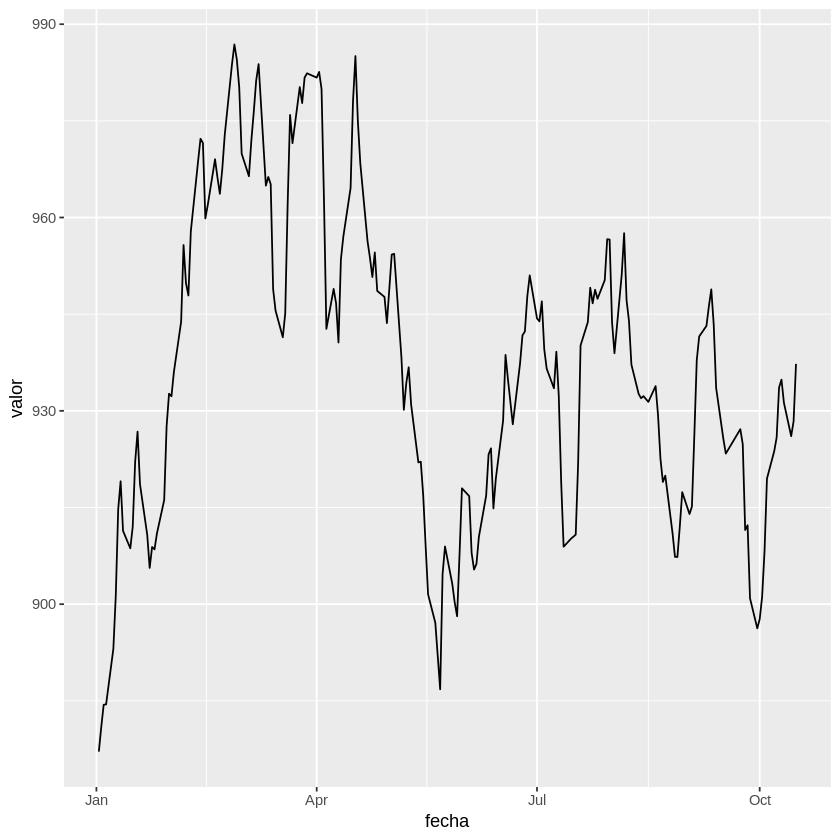

In [69]:
# Visualizamos la serie del dolar (fecha v/s valor)
dolar %>%
  mutate(fecha = as.Date(fecha)) %>%
  ggplot() +
  aes(x = fecha, y = valor) +
  geom_line()

In [74]:
## Ejemplo, consideramos incluir etiquetas y cortes en el eje de tiempo
graf1 <- dolar %>%
  mutate(fecha = as.Date(fecha)) %>%
  ggplot() +
  aes(x = fecha, y = valor) +
  geom_line() +
  labs(x = "Fecha de observación del dolar",
       y = "Valor del dolar observado",
       title = "Serie del dolar observado",
       subtitle = "Año 2024",
       caption = "Fuente: mindicador.cl") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %y") +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


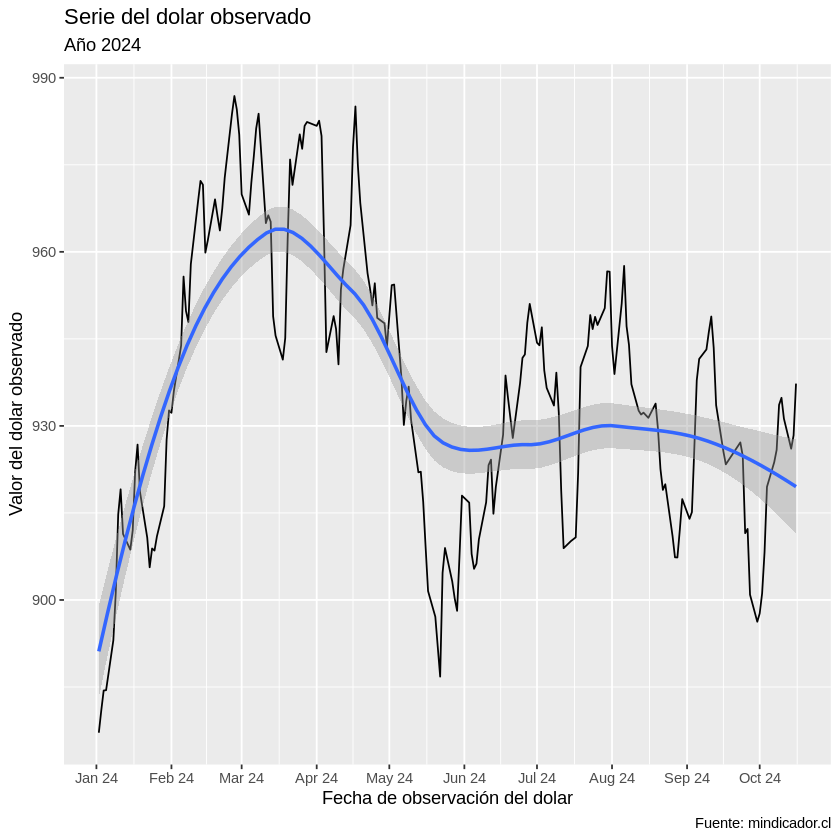

In [75]:
graf1

# Guardar un gráfico en el directorio local
Podemos guardar nuestros gráficos en un  directorio local con funciones propias de ggplot2.
```
ggsave(
  filename,
  plot = last_plot(),
  device = NULL,
  path = NULL,
  scale = 1,
  width = NA,
  height = NA,
  units = c("in", "cm", "mm", "px"),
  dpi = 300,
  limitsize = TRUE,
  bg = NULL,
  create.dir = FALSE,
  ...
)
```

In [76]:
ggsave(filename = "dolar2024.png",
plot = graf1)

Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
